In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
import scipy.optimize
from matplotlib import rcParams

rcParams.update({'font.size': 14})
import seaborn as sns
sns.set()

In [2]:
h = 0.5
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)

X, Y = np.meshgrid(x, y)
F0 = 1.5 - 1.0 * np.exp(-0.03 * (3 * np.power(X, 2) + np.power(Y, 2)))
F = 1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X, 2) + np.power(Y + 3, 2)))
F2 = F + (0.5 - 1.0 * np.exp(-0.1 * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2))))

# dF0x,dF0y = np.gradient(F0,h,h) 
# dF2x,dF2y = np.gradient(F2,h,h) 

dF0y, dF0x = np.gradient(F0, h, h)
dF2y, dF2x = np.gradient(F2, h, h)

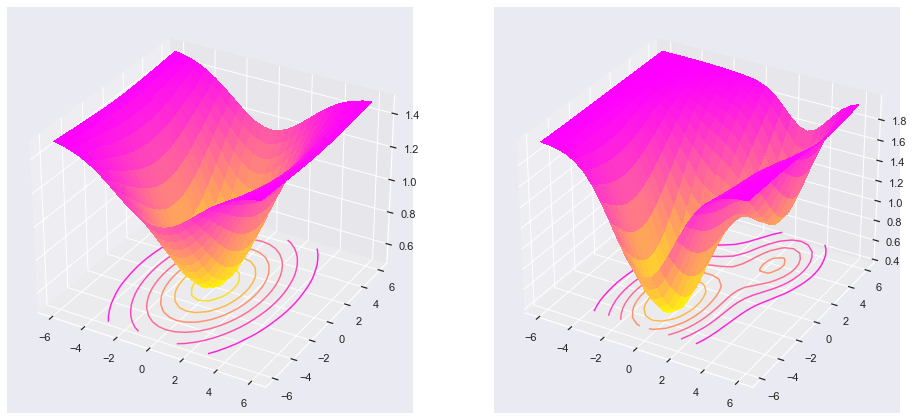

In [3]:
rcParams['figure.figsize'] = [16, 8]
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
axs[0].plot_surface(X, Y, F0, cmap='spring_r', linewidth=0, antialiased=False)
axs[0].contour(X, Y, F0, zdir='z', offset=axs[0].get_zlim()[0], cmap='spring_r')
axs[1].plot_surface(X, Y, F2, cmap='spring_r', linewidth=0, antialiased=False)
axs[1].contour(X, Y, F2, zdir='z', offset=axs[0].get_zlim()[0], cmap='spring_r')

plt.show()

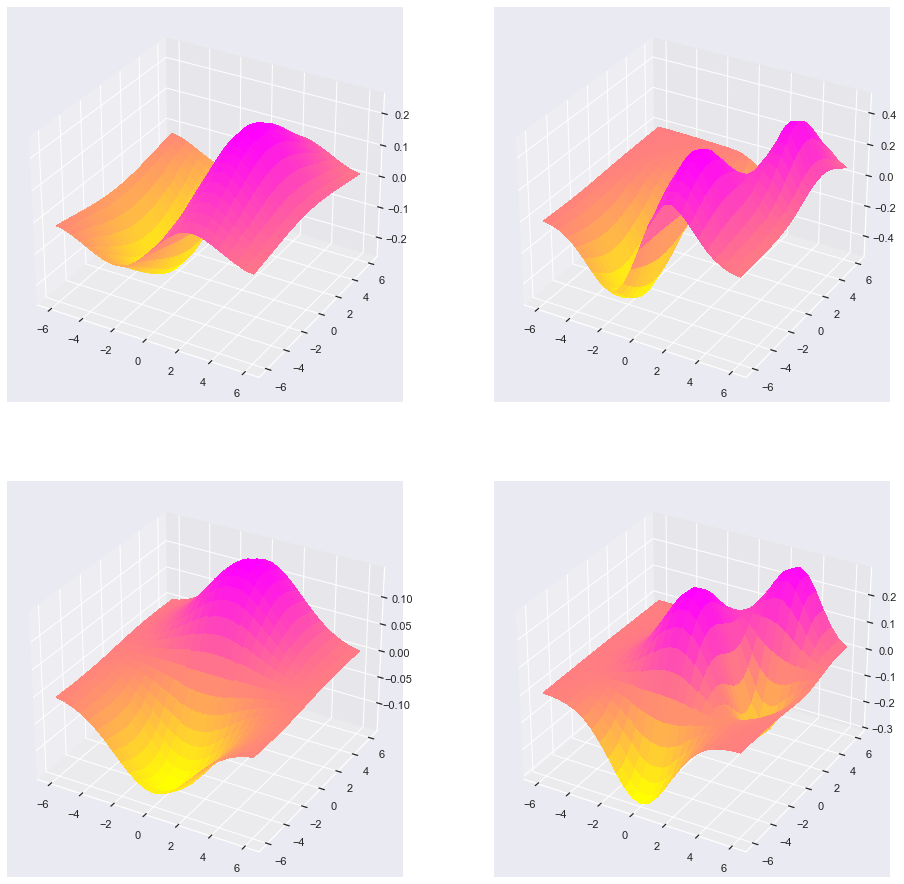

In [4]:
rcParams['figure.figsize'] = [16, 16]
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)
axs[0].plot_surface(X, Y, dF0x, cmap='spring_r', linewidth=0, antialiased=False)
axs[2].plot_surface(X, Y, dF0y, cmap='spring_r', linewidth=0, antialiased=False)
axs[1].plot_surface(X, Y, dF2x, cmap='spring_r', linewidth=0, antialiased=False)
axs[3].plot_surface(X, Y, dF2y, cmap='spring_r', linewidth=0, antialiased=False)

plt.show()

In [5]:
## Gradient Descent
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

Fquad = np.power(X, 2) + 3 * np.power(Y, 2)

x[0] = 3  # Initial guess
y[0] = 2

f[0] = x[0] ** 2 + 3 * y[0] ** 2  # Initial function value

for j in range(len(x) - 1):
    Del = (x[j] ** 2 + 9 * y[j] ** 2) / (2 * x[j] ** 2 + 54 * y[j] ** 2)
    x[j + 1] = (1 - 2 * Del) * x[j]  # update values
    y[j + 1] = (1 - 6 * Del) * y[j]
    f[j + 1] = x[j + 1] ** 2 + 3 * y[j + 1] ** 2

    if np.abs(f[j + 1] - f[j]) < 10 ** (-6):  # check convergence
        x = x[:j + 2]
        y = y[:j + 2]
        f = f[:j + 2]
        break

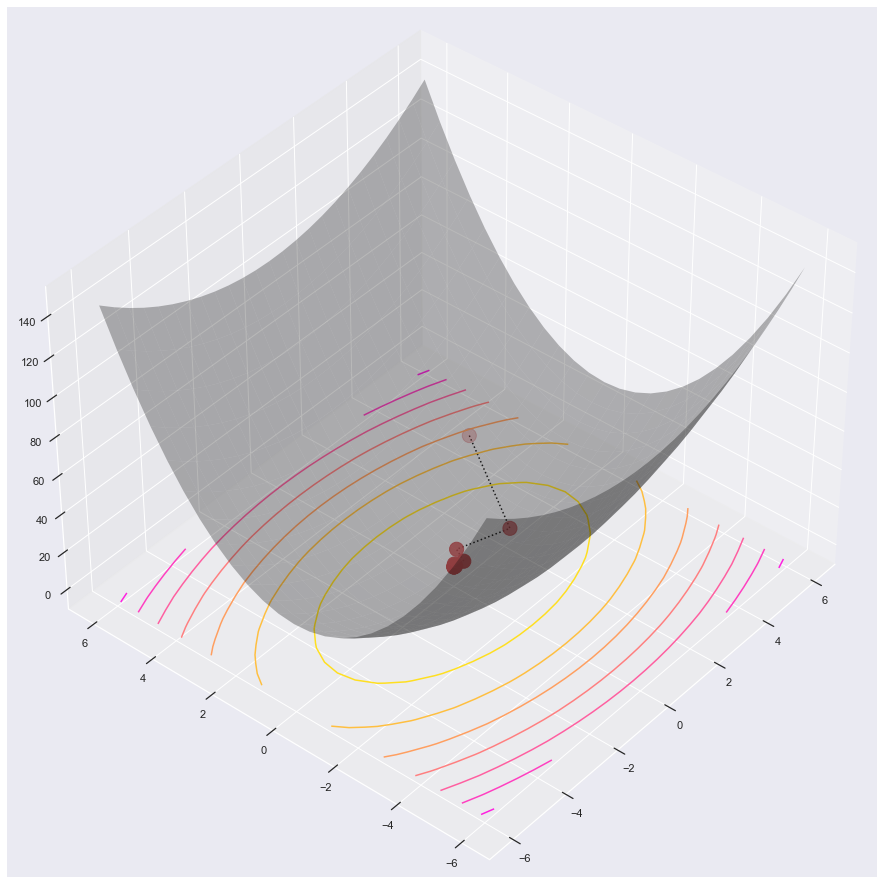

In [6]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Fquad, linewidth=0, color='k', alpha=0.3)
ax.scatter(x, y, f, 'o', color='r', s=200)
ax.plot(x, y, f, ':', color='k')
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='spring_r')
ax.view_init(elev=40, azim=-140)
plt.show()

In [7]:
## Computing the gradient descent with fmin

h = 0.1
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)
X, Y = np.meshgrid(x, y)

F1 = 1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X + 3, 2) + np.power(Y + 3, 2)))
F = F1 + 0.5 - np.exp(-0.1 * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2)))

dFy, dFx = np.gradient(F, h, h)

F_interp = scipy.interpolate.RectBivariateSpline(x, y, F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x, y, dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x, y, dFy)

x0 = np.array([4, 0, -5])
y0 = np.array([0, -5, 2])


def delsearch(Del, t):
    x, y, dfx, dfy, X, Y, F = t
    x0 = x - Del * dfx
    y0 = y - Del * dfy
    return F_interp(x0, y0)


for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0], y[0])
    dfx = dFx_interp(x[0], y[0])
    dfy = dFy_interp(x[0], y[0])
    for j in range(len(x) - 1):
        t = x[j], y[j], dfx, dfy, X, Y, F
        Del = scipy.optimize.fmin(delsearch, 0.2, args=(t,), disp=False);
        x[j + 1] = x[j] - Del * dfx  # Update x, y, and f
        y[j + 1] = y[j] - Del * dfy
        f[j + 1] = F_interp(x[j + 1], y[j + 1])
        dfx = dFx_interp(x[j + 1], y[j + 1])
        dfy = dFy_interp(x[j + 1], y[j + 1])

        if np.abs(f[j + 1] - f[j]) < 10 ** (-6):
            x = x[:j + 2]
            y = y[:j + 2]
            f = f[:j + 2]
            break

    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

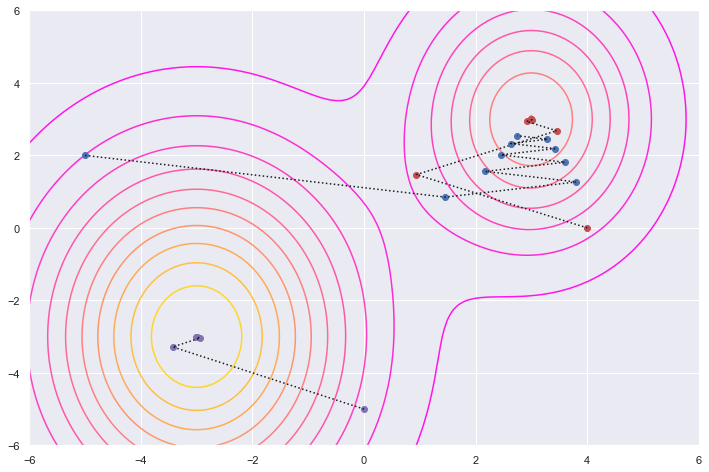

In [8]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X, Y, F - 1, 10, cmap='spring_r')
plt.plot(x1, y1, 'o', color='r')
plt.plot(x1, y1, ':', color='k')
plt.plot(x2, y2, 'o', color='m')
plt.plot(x2, y2, ':', color='k')
plt.plot(x3, y3, 'o', color='b')
plt.plot(x3, y3, ':', color='k')
plt.show()

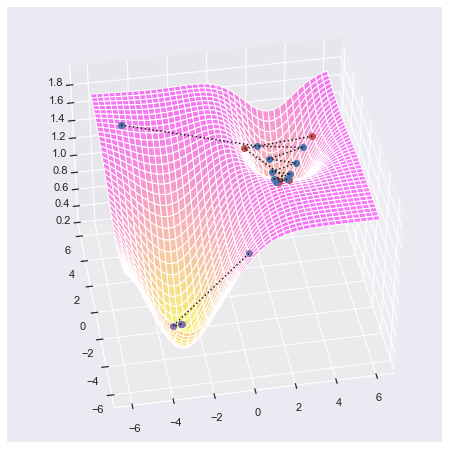

In [9]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F - 0.2, cmap='spring_r', alpha=0.5)
ax.plot(x1, y1, f1, 'o', color='r')
ax.plot(x1, y1, f1, ':', color='k')
ax.plot(x2, y2, f2, 'o', color='m')
ax.plot(x2, y2, f2, ':', color='k')
ax.plot(x3, y3, f3, 'o', color='b')
ax.plot(x3, y3, f3, ':', color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

In [10]:
## Alternating Descent
h = 0.1
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)
X, Y = np.meshgrid(x, y)

F1 = 1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X + 3, 2) + np.power(Y + 3, 2)))
F = F1 + 0.5 - np.exp(-0.1 * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2)))

F_interp = scipy.interpolate.RectBivariateSpline(x, y, F)

x0 = np.array([4, 0, -5])
y0 = np.array([0, -5, 2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0], ya[0])

    fx = F_interp(xa[0], y)
    xa[1] = xa[0]
    ya[1] = y[np.argmin(fx)]

    fy = F_interp(x, ya[1])
    ya[2] = ya[1]
    xa[2] = x[np.argmin(fy)]

    fx = F_interp(xa[2], y)
    xa[3] = xa[2]
    ya[3] = y[np.argmin(fx)]

    fy = F_interp(x, ya[3])
    ya[4] = ya[3]
    xa[4] = x[np.argmin(fy)]

    for j in range(1, 5):
        f[j] = F_interp(xa[j], ya[j])

    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

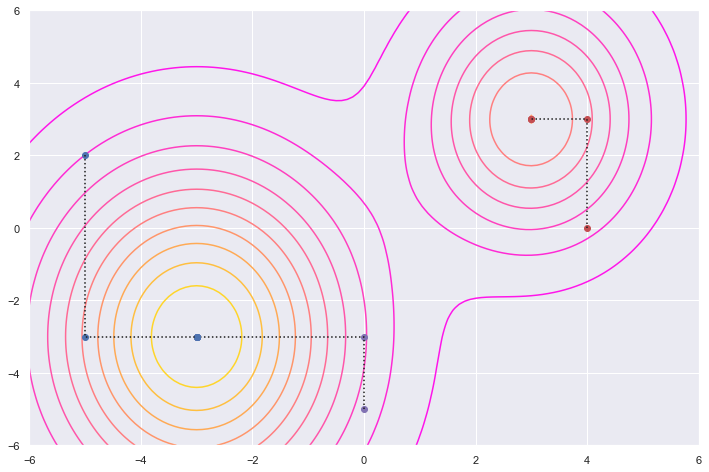

In [11]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X, Y, F - 1, 10, cmap='spring_r')
plt.plot(x1, y1, 'o', color='r')
plt.plot(x1, y1, ':', color='k')
plt.plot(x2, y2, 'o', color='m')
plt.plot(x2, y2, ':', color='k')
plt.plot(x3, y3, 'o', color='b')
plt.plot(x3, y3, ':', color='k')
plt.show()

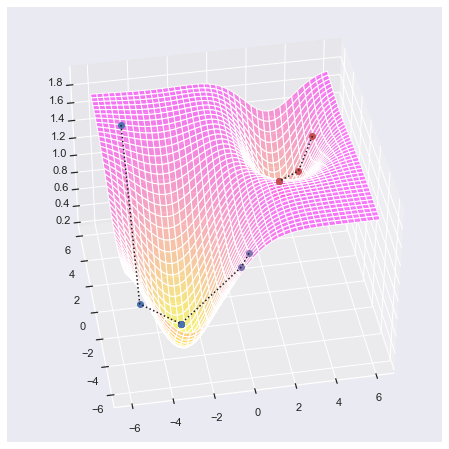

In [12]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F - 0.2, cmap='spring_r', alpha=0.5)
ax.plot(x1, y1, f1, 'o', color='r')
ax.plot(x1, y1, f1, ':', color='k')
ax.plot(x2, y2, f2, 'o', color='m')
ax.plot(x2, y2, f2, ':', color='k')
ax.plot(x3, y3, f3, 'o', color='b')
ax.plot(x3, y3, f3, ':', color='k')
ax.view_init(elev=40, azim=-100)
plt.show()